f:
31.248111054021237
gradient:
[-9. -4.]
hessian:
delta=array([[-3.,  0.],
       [ 0., -2.]])
[[8. 0.]
 [0. 7.]]
delta=array([[-3.,  0.],
       [ 0., -2.]])
[1.125      0.57142857]


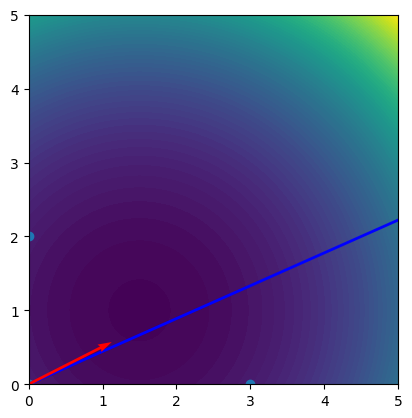

In [3]:
import numpy as np


def f(
    pos: np.ndarray, i: int, adj_i: np.ndarray, data_i: np.ndarray, k: float
) -> float:
    assert adj_i.shape == data_i.shape
    dist = np.linalg.norm(pos[i] - pos[adj_i])
    return np.sum(data_i * (dist**3) / (3 * k))


def gradient(
    pos: np.ndarray, i: int, adj_i: np.ndarray, data_i: np.ndarray, k: float
) -> np.ndarray:
    assert adj_i.shape == data_i.shape
    delta = pos[i] - pos[adj_i]
    dist = np.linalg.norm(delta, axis=1)
    return np.sum((data_i * dist / k)[:, np.newaxis] * delta, axis=0)


def hessian(
    pos: np.ndarray, i: int, adj_i: np.ndarray, data_i: np.ndarray, k: float
) -> np.ndarray:
    assert adj_i.shape == data_i.shape
    delta = pos[i] - pos[adj_i]
    dist = np.linalg.norm(delta, axis=1)
    assert np.allclose(
        np.einsum("ij,ik->jk", (data_i / (k * dist))[:, np.newaxis] * delta, delta),
        (data_i[0] / (k * dist[0])) * np.outer(delta[0], delta[0])
        + (data_i[1] / (k * dist[1])) * np.outer(delta[1], delta[1]),
    )
    return np.sum(data_i * dist / k) * np.eye(2) + np.einsum(
        "ij,ik->jk", (data_i / (k * dist))[:, np.newaxis] * delta, delta
    )


k = 1.0
pos = np.array([[0.0, 0.0], [+3.0, +0.0], [+0.0, +2.0]])
adj = [[1, 2], [0], [0]]
data = [[1.0, 1.0], [1.0], [1.0]]
adj = list(map(lambda x: np.array(x, dtype=int), adj))
data = list(map(np.array, data))

i = 0
print("f:")
print(f(pos, i, adj[i], data[i], k))
print("gradient:")
print(gradient(pos, i, adj[i], data[i], k))
print("hessian:")
print(hessian(pos, i, adj[i], data[i], k))

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect("equal")

# draw f(x) with i=0
x = np.linspace(0, 5, 100)
ax.set_xlim(0, 5)
y = np.linspace(0, 5, 100)
ax.set_ylim(0, 5)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for x_idx in range(X.shape[0]):
    for y_idx in range(X.shape[1]):
        pos2 = np.array([[X[x_idx, y_idx], Y[x_idx, y_idx]]] + pos[1:].tolist())
        Z[x_idx, y_idx] = f(pos2, i, adj[i], data[i], k)

plt.contourf(X, Y, Z, levels=100, cmap="viridis")

plt.scatter(pos[:, 0], pos[:, 1])

# draw gradient from pos[i]
g = gradient(pos, i, adj[i], data[i], k)
plt.quiver(
    pos[i, 0],
    pos[i, 1],
    -100 * g[0],
    -100 * g[1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="blue",
)

# draw Newton direction from pos[i]
hess = hessian(pos, i, adj[i], data[i], k)
assert np.all(np.linalg.eigvals(hess) > 0)
h = np.linalg.solve(hess, -g)
print(h)
plt.quiver(
    pos[i, 0],
    pos[i, 1],
    h[0],
    h[1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="red",
)

plt.show()